<a href="https://colab.research.google.com/github/Julieth-Plazas/FrontEnd/blob/main/CienciasDatos2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis exploratorio, Unidad 3 ciencia de datos Generacion TIC



In [10]:
#Analisis exploratorio
#Importe de las bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
#carga del conjunto de datos
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [6]:
#inspeccion visual del conjunto a los 10 primeros datos
print(df.head,10)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [8]:
#tipo de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<Axes: >

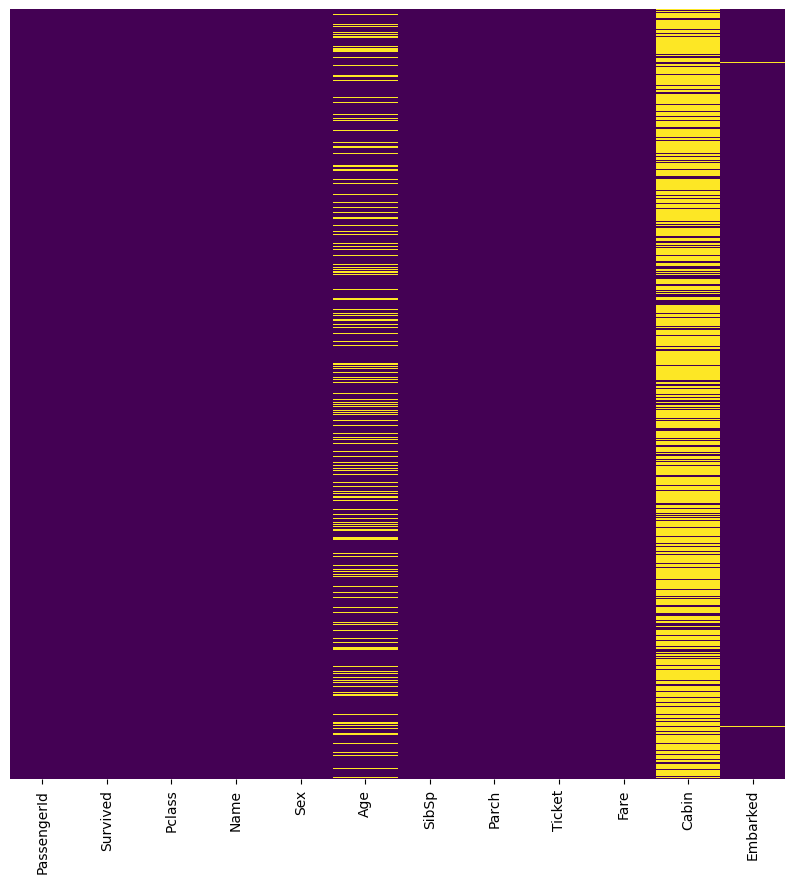

In [15]:
#analisis valores faltantes
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")


EN EDAD Y CABINA HAY DATOS FALTANTES

<ipython-input-16-a2a079ed26a9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

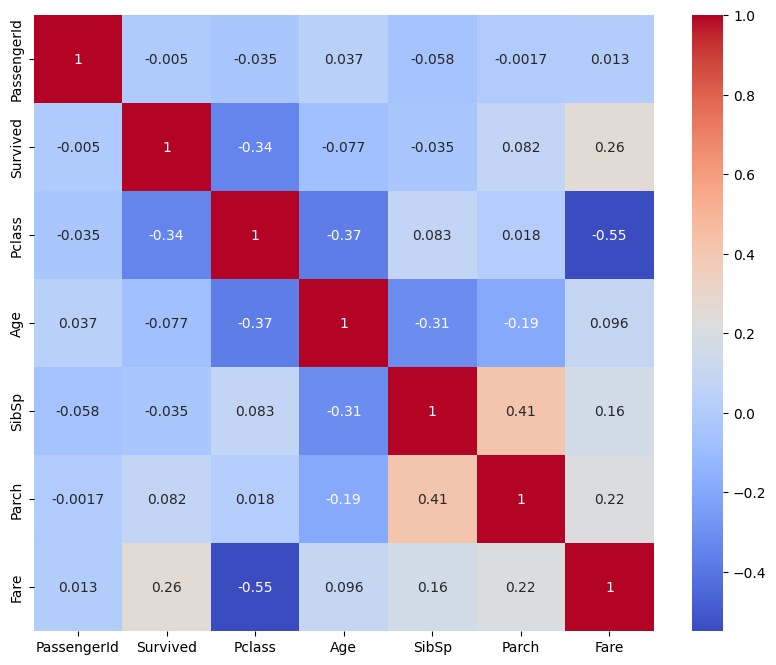

In [16]:
#Visualizar los datos
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

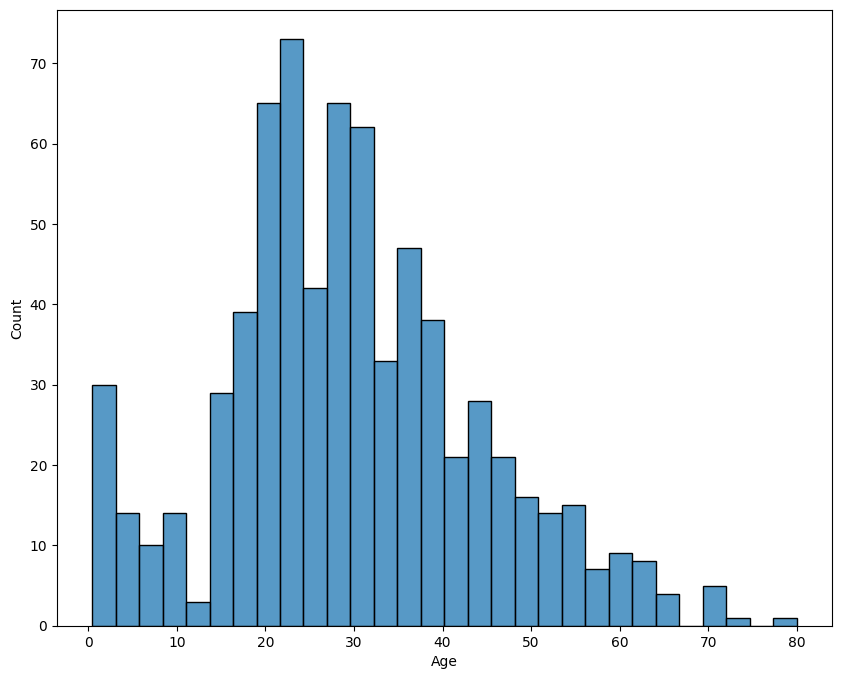

In [17]:
#distribucion de la edad
plt.figure(figsize=(10,8))
sns.histplot(df['Age'].dropna(),kde=False, bins=30)


Distribucion casi normal, extendida a la izquierda, la mayor cantidad se concentra entre los de 20 años a 40 años. el valor mas alto es de 80 años. muchos jovenes eran pasajeros

<Axes: xlabel='Survived', ylabel='count'>

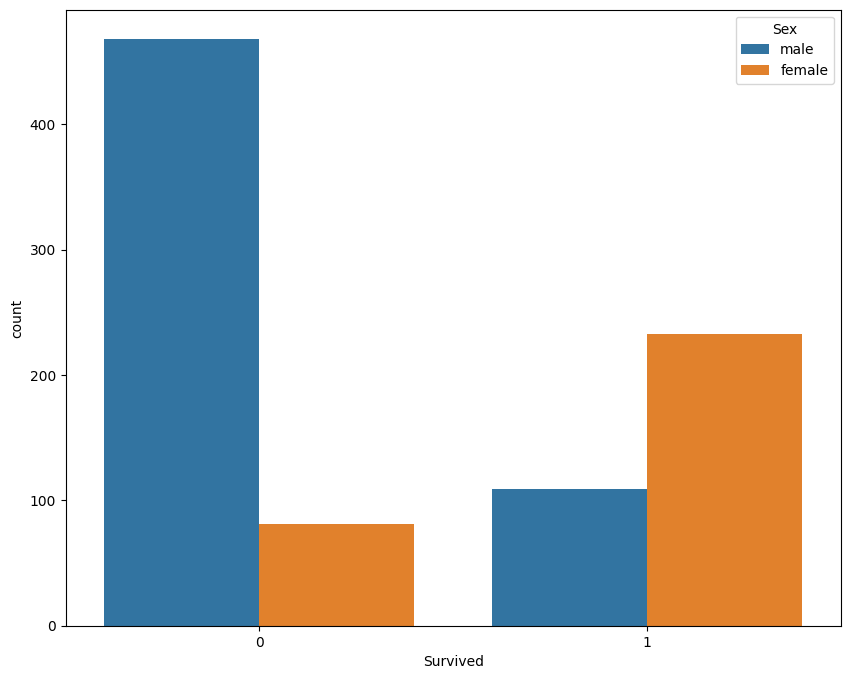

In [19]:
#sobreviviente por genero
plt.figure(figsize=(10,8))
sns.countplot(x= 'Survived', hue = 'Sex', data=df)

Las mujeres en su mayoria sobrevivieron, 400 hombre fallecieron, menos de 100 mujeres murieron


<Axes: xlabel='Survived', ylabel='count'>

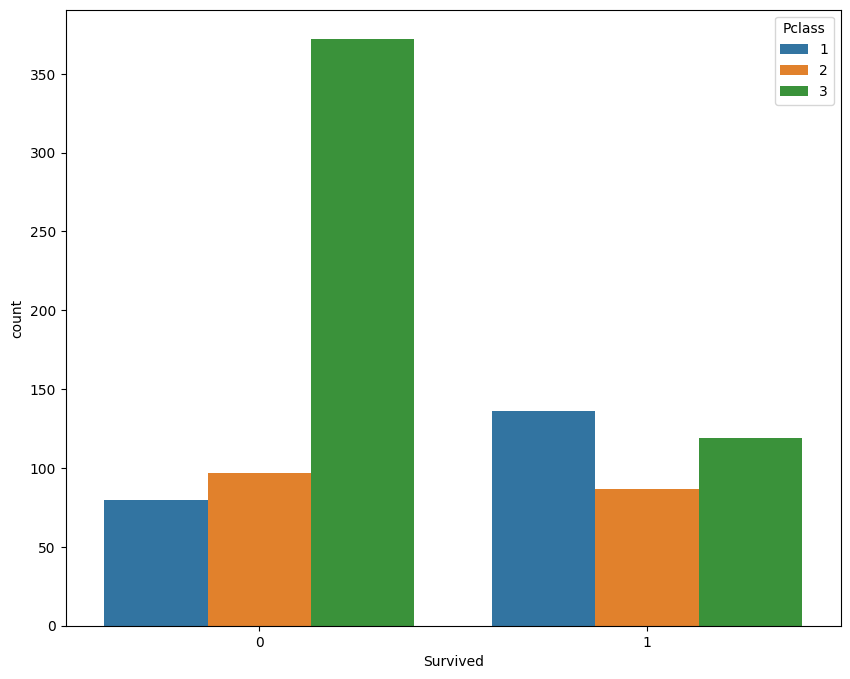

In [20]:
#sobreviviente por clase
plt.figure(figsize=(10,8))
sns.countplot(x= 'Survived', hue = 'Pclass', data=df)

mayor probabilidad de sobrevivir los de primera clase

<Axes: xlabel='Fare', ylabel='Count'>

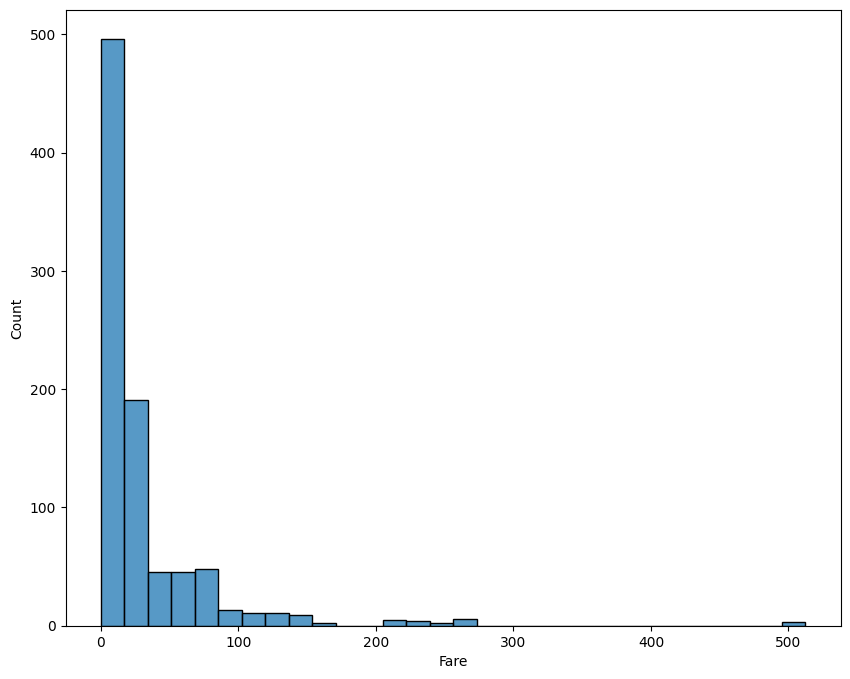

In [21]:
#Distribucion d ela tarifa
plt.figure(figsize=(10,8))
sns.histplot(df['Fare'].dropna(),kde=False, bins=30)


La mayoria de los boletos valian menos de 10 dolares, muy pocos pagaron mas de 500 dolares.

<Axes: xlabel='Pclass', ylabel='Age'>

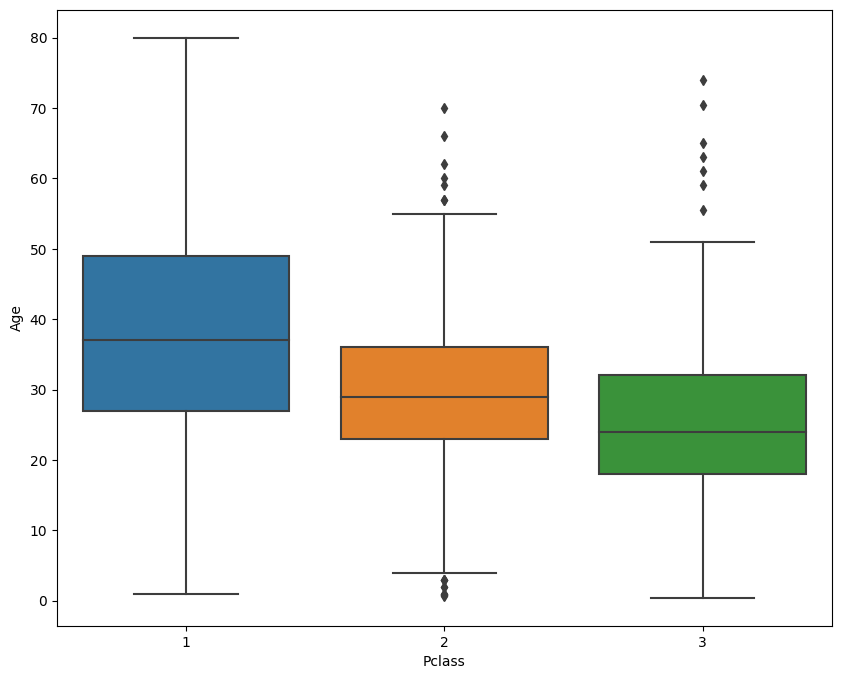

In [22]:
#Relacion entre la edad y la clase
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=df)

Los mas jovenes eran los de tercer clase(promedio de 25 años)
Los de clase tenian un promedio de 30 años
los de clase uno tenian un promedio de 38 años

<Axes: xlabel='Sex', ylabel='Age'>

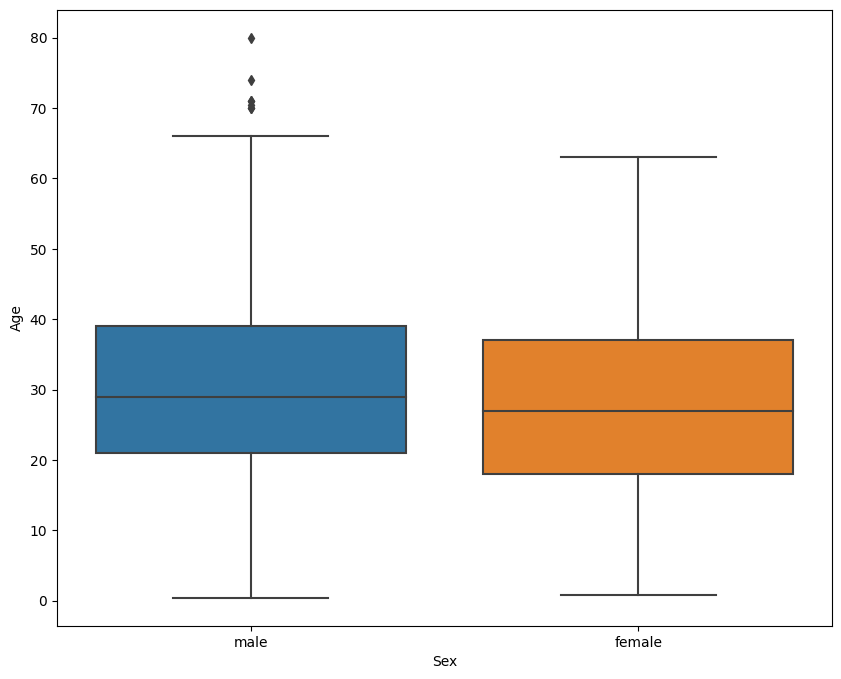

<Axes: xlabel='Sex', ylabel='Age'>

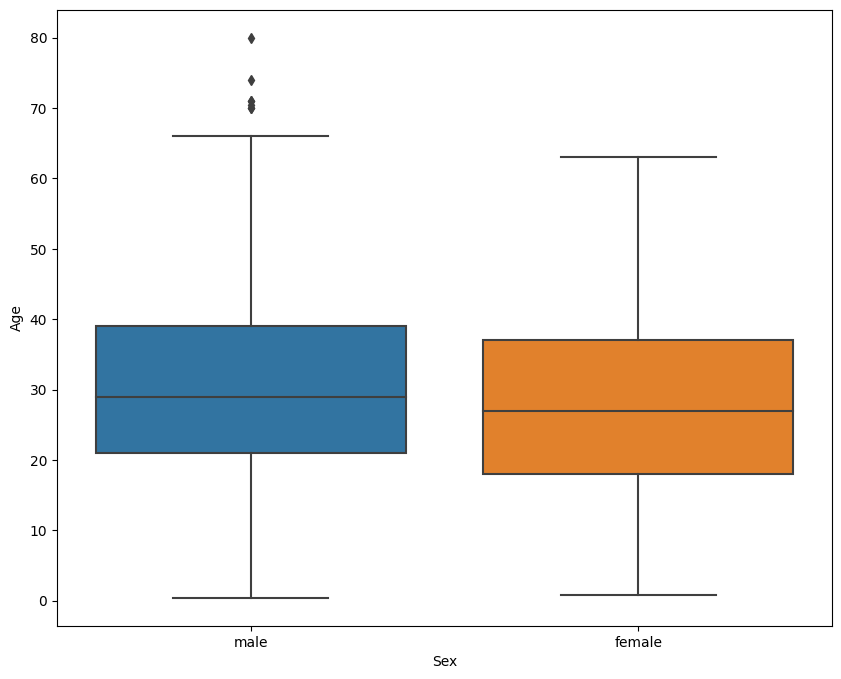

In [24]:
#relacion entre edad y genero
plt.figure(figsize=(10,8))
sns.boxplot(x='Sex', y='Age', data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

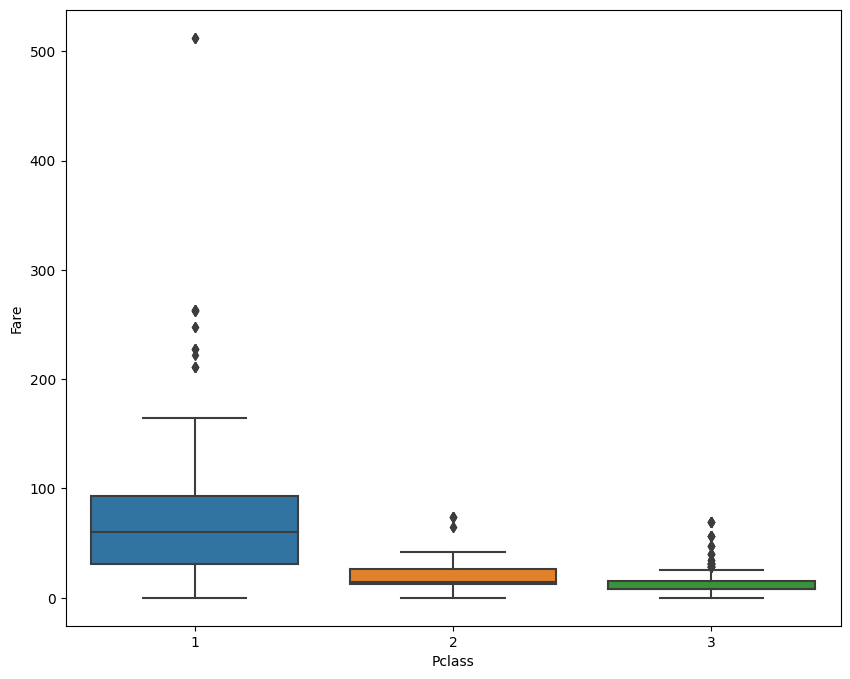

In [25]:
#Relacion entre la tarifa y la clase
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Fare', data=df)

Los comportamientos mas distribbuidos son los de primera clase. hay gente que pago mas de los 200 dolares por clase

In [28]:
#Crear caracteristica FamilySize que combina Sibsp y Parch
df['FamilySize']=df['SibSp']+ df['Parch']+1

In [30]:
#Crear caracteristica IsAlone que indica si el pasajero esta solo
df['IsAlone'] =0
df.loc[df['FamilySize']==1, 'IsAlone']=1


In [33]:
#Crear caracteristica AgeClass que combina la edad y la clase
df['AgeClass']=df['Age']*df['Pclass']


In [32]:
#Crear caracteristica FareForPerson que divide Fare por FamilySize
df['FareForPerson']=df['Fare']/ df['FamilySize']+1

<ipython-input-34-812e05380695>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

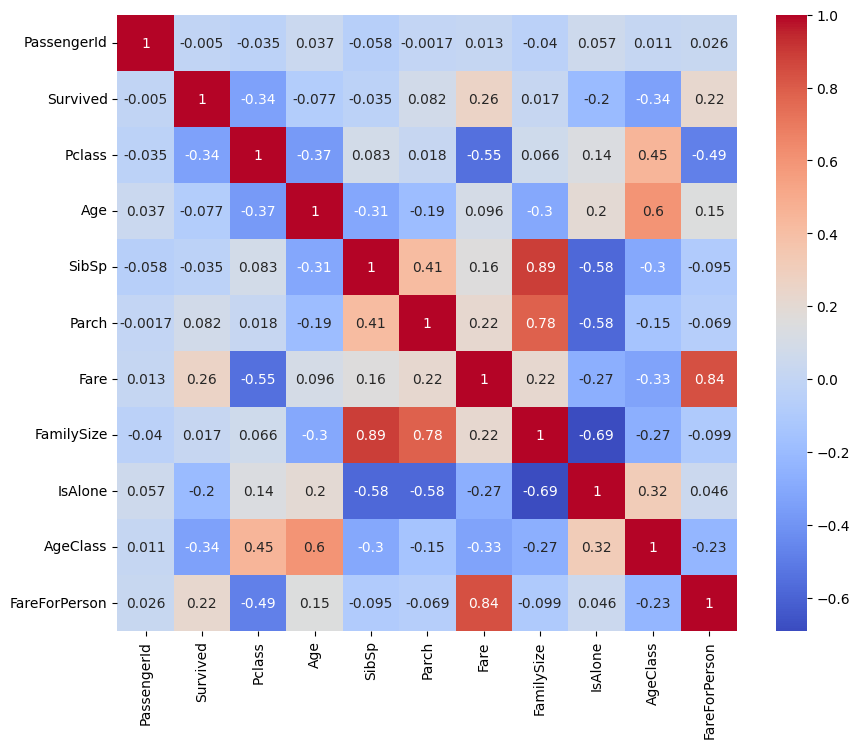

In [34]:
#Visualizar las nuevas caracteristicas
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='IsAlone', ylabel='count'>

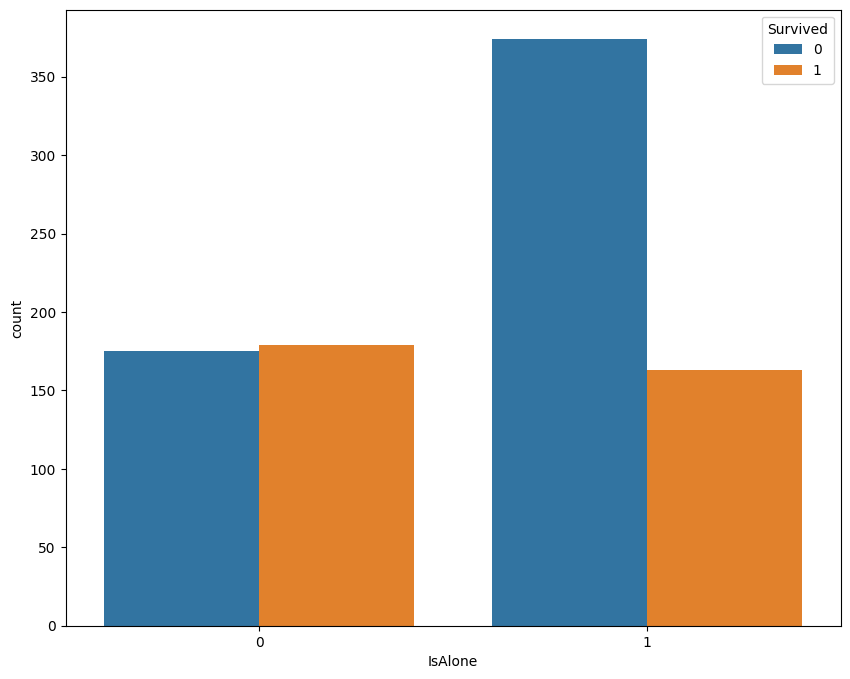

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'IsAlone', hue = 'Survived', data=df)

<Axes: xlabel='FamilySize', ylabel='Count'>

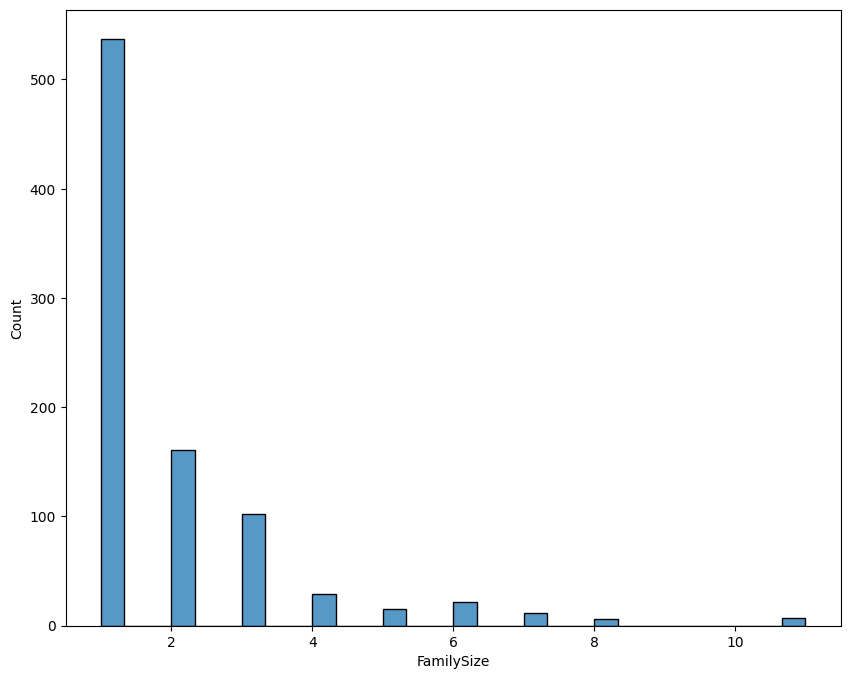

In [37]:
plt.figure(figsize=(10,8))
sns.histplot(df['FamilySize'].dropna(),kde=False, bins=30)


<Axes: xlabel='AgeClass', ylabel='Count'>

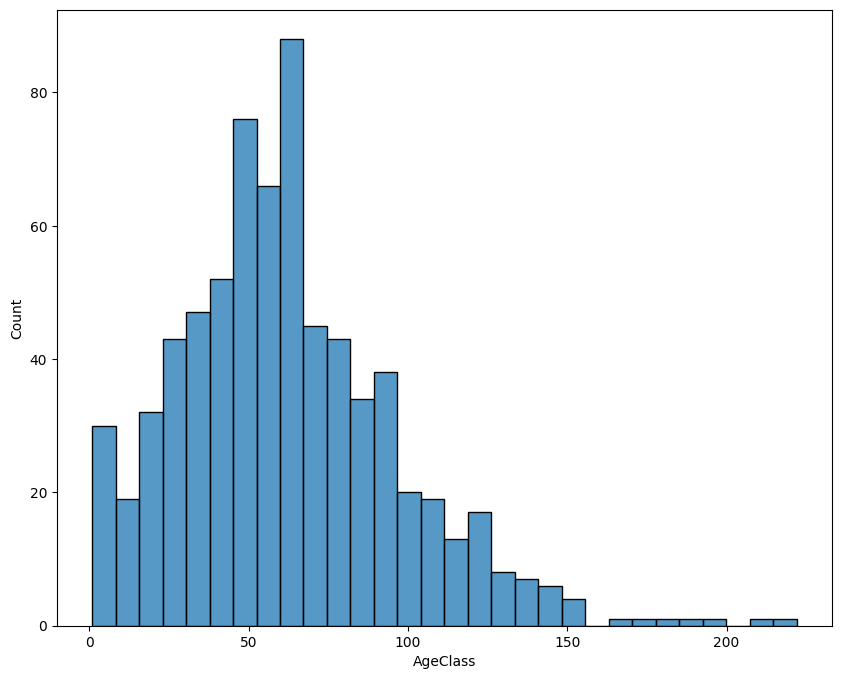

In [38]:
plt.figure(figsize=(10,8))
sns.histplot(df['AgeClass'].dropna(),kde=False, bins=30)


Distribucion mas homogenea que la distribucion de la edad

<Axes: xlabel='FareForPerson', ylabel='Count'>

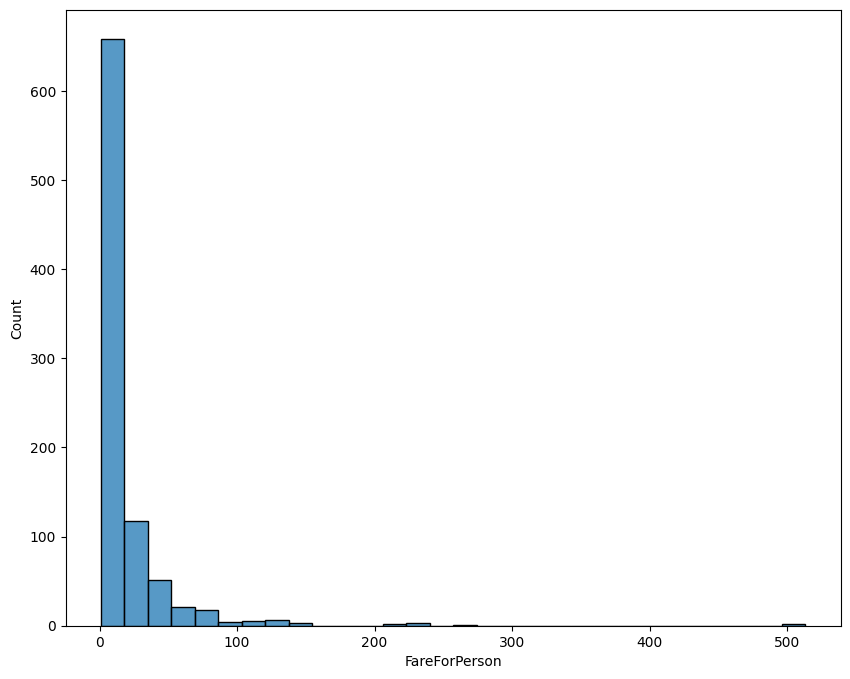

In [39]:
plt.figure(figsize=(10,8))
sns.histplot(df['FareForPerson'].dropna(),kde=False, bins=30)
